In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#用于将数据标准化
from sklearn.neighbors import KNeighborsClassifier
#导入knn实现库
from sklearn.metrics import confusion_matrix
#导入混淆矩阵有关的库
from sklearn.metrics import classification_report
#可输出召回率精确率等

In [5]:
dataset = pd.read_csv('Social_Network_Ads.csv')
x = dataset.iloc[:, [2,3]].values #特征只取年龄和收入
y = dataset.iloc[: , 4].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [3]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [8]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
#必须先用fit_transform(trainData)，之后再transform(testData)
#如果直接transform(testData)，程序会报错
#如果fit_transfrom(trainData)后，使用fit_transform(testData)而不transform(testData)，虽然也能归一化，但是两个结果不是在同一个“标准”下的，具有明显差异。(一定要避免这种情况)

In [12]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
#k值选择默认为5，metric ='minkowski'(距离度量的选择，这里选择的是闵氏距离(默认参数))
#p = 2表示欧氏距离即L2，
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [13]:
y_pred = classifier.predict(x_test)
#用测试集预测

In [14]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [17]:
cm = confusion_matrix(y_test, y_pred)
#混淆矩阵

In [16]:
cm

array([[64,  4],
       [ 3, 29]], dtype=int64)

In [23]:
print(classification_report(y_test, y_pred))
#其中列表左边的一列为分类的标签名，右边support列为每个标签的出现次数．avg / total行为各列的均值（support列为总和）． 
#precision recall f1-score三列分别为各个类别的精确度/召回率及 F1 F1值．

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


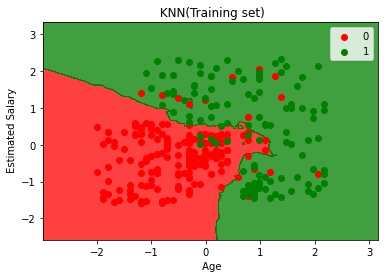

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


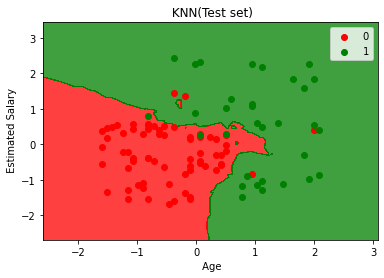

In [26]:
from matplotlib.colors import ListedColormap
X_set,y_set=x_train,y_train
X1,X2=np. meshgrid(np. arange(start=X_set[:,0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
                   np. arange(start=X_set[:,1].min()-1, stop=X_set[:,1].max()+1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),   alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np. unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],  c = ListedColormap(('red', 'green'))(i), label=j)

plt. title(' KNN(Training set)')
plt. xlabel(' Age')
plt. ylabel(' Estimated Salary')
plt. legend()
plt. show()

X_set,y_set=x_test,y_test
X1,X2=np. meshgrid(np. arange(start=X_set[:,0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
                   np. arange(start=X_set[:,1].min()-1, stop=X_set[:,1].max()+1, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),  alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np. unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],   c = ListedColormap(('red', 'green'))(i), label=j)

plt. title(' KNN(Test set)')
plt. xlabel(' Age')
plt. ylabel(' Estimated Salary')
plt. legend()
plt. show()

In [ ]:
#导入要用的库
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score as AUC
import matplot.pyplot as plt

# 利用roc_curve函数获得假阳性率FPR，和真阳性率recall，都是一系列值
FPR, recall, thresholds = roc_curve(test_prob["1"],test_prob["0"])
# 计算AUC面积
area = AUC(test_prob["1"], test_prob["0"])

# 画图
plt.figure()
plt.plot(FPR,recall,label='ROC curve (area = %0.2f)' % area)
plt.legend(loc="lower right")
plt.show()